# Regresión Lineal

### Bibliotecas

* Pandas

  La biblioteca de Pandas se utiliza principalmente para el análisis y manipulación de datos estructurados. Proporciona estructuras de datos poderosas, como el **DataFrame**, que permite trabajar con datos de manera eficiente. Pandas facilita la carga de datos desde diferentes fuentes, permite realizar operaciones como filtrado, agregación, transformación y visualización de datos de forma sencilla y eficaz. Es una herramienta fundamental en el análisis de datos en Python debido a su versatilidad y rendimiento.

* Numpy
  La biblioteca de **numpy** es utilizada para computación numérica y manipulación de arreglos multidimensionales. Proporciona un conjunto de funciones y operaciones eficientes para trabajar con matrices y vectores, lo que es esencial para el análisis numérico y científico de datos. NumPy permite realizar operaciones matemáticas rápidas en grandes conjuntos de datos

* Sklearn

 La biblioteca **scikit-learn** en Python se utiliza principalmente para realizar aprendizaje automático (**machine learning**). Proporciona herramientas eficientes para la construcción de modelos de aprendizaje supervisado y no supervisado, incluyendo clasificación, regresión, clustering, reducción de dimensionalidad y preprocesamiento de datos. Sklearn ofrece una interfaz consistente y fácil de usar para trabajar con algoritmos de aprendizaje automático, además de herramientas para evaluar y comparar modelos. Es una biblioteca fundamental para desarrollar aplicaciones de aprendizaje automático en Python debido a su amplia gama de funcionalidades y su integración con otras bibliotecas científicas como NumPy y Pandas.

* Matplotlib y seaborn
  la libreria **matplotlib** que se utiliza para crear gráficos y visualizaciones de datos de manera detallada y personalizada. Por otro lado, seaborn es una extensión de matplotlib que simplifica la creación de gráficos estadísticos más avanzados con menos código, como diagramas de dispersión con regresión o mapas de calor

  



In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


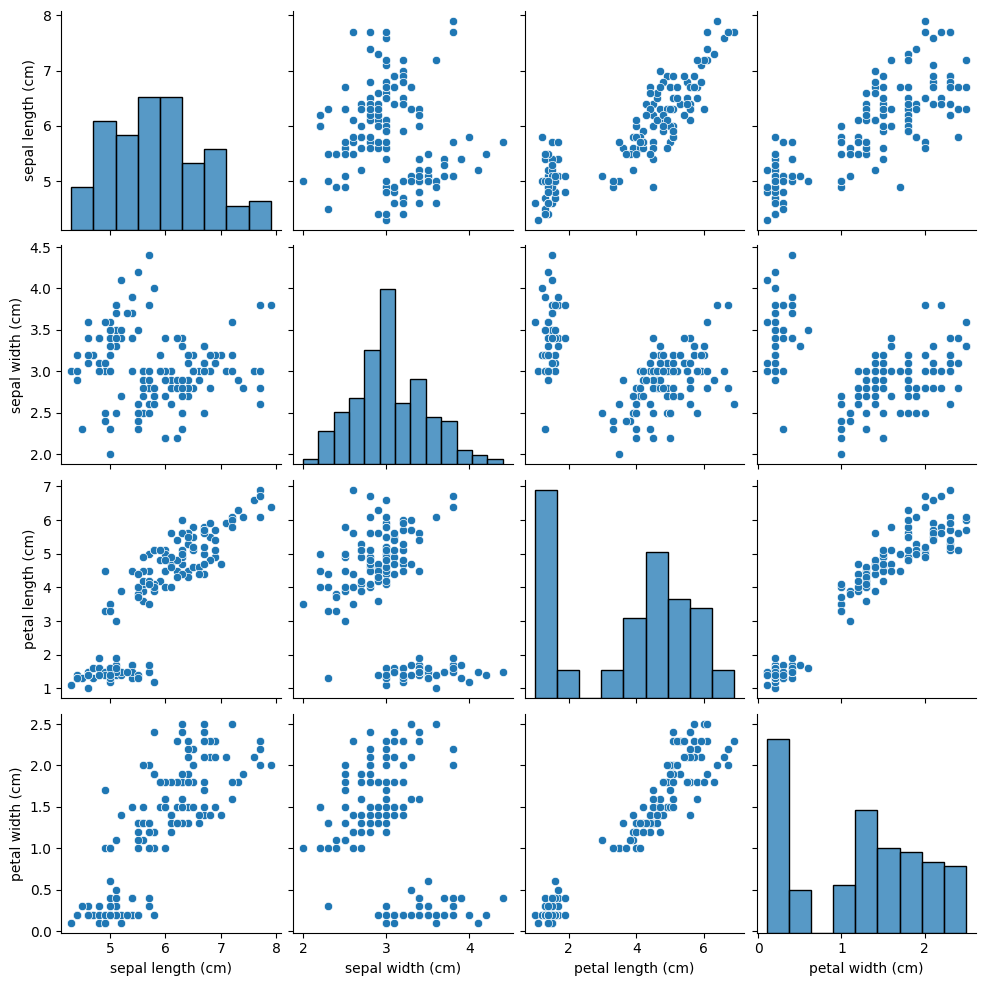

In [2]:
# Carga el conjunto de datos en un DataFrame
from sklearn.datasets import load_iris

datos = load_iris()

# Crea un DataFrame usando pandas
df = pd.DataFrame(data=datos.data, columns=datos.feature_names)

print(df.head())

sns.pairplot(df)

plt.show()


  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/1280px-Anscombe%27s_quartet_3.svg.png"></img>
  


                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)                1.0               NaN                NaN   
sepal width (cm)                 NaN               1.0                NaN   
petal length (cm)                NaN               NaN           1.000000   
petal width (cm)                 NaN               NaN           0.962865   

                   petal width (cm)  
sepal length (cm)               NaN  
sepal width (cm)                NaN  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


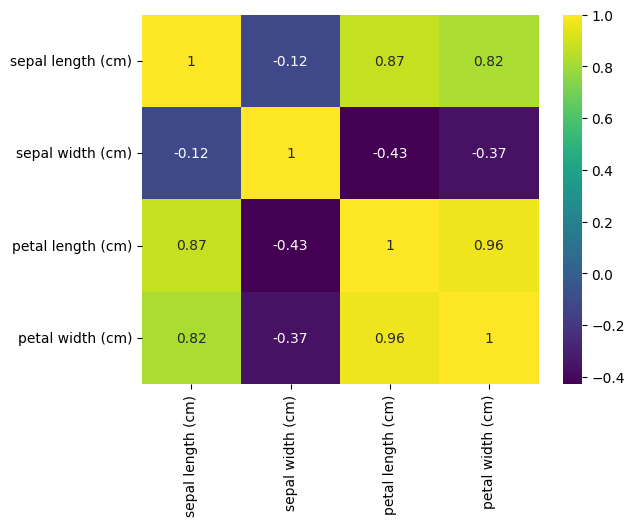

In [3]:
# Calcula la matriz de correlación
correlaciones = df.corr()

sns.heatmap(correlaciones, annot=True, cmap="viridis")
#print(correlaciones)

# Filtra las correlaciones que son mayores que 0.8 o menores que -0.8
correlaciones_filtradas = correlaciones[(abs(correlaciones) > 0.9)]

print(correlaciones_filtradas)


Podemos ver que existe una correlacion entre "petal lenght" y "petal width"

Eliminamos el resto de datos por comodidad y nos quedaremos solo con los que nos interesan para la regresion lineal

In [4]:
# Eliminar las columnas "sepal length (cm)" y "sepal width (cm)"
columnas_a_eliminar = ["sepal length (cm)", "sepal width (cm)"]
df_limpio = df.drop(labels=columnas_a_eliminar, axis=1)

# Definir nuevos nombres de columnas
nuevos_nombres = ['Longitud_Petalo', 'Ancho_Petalo']

# Asignar los nuevos nombres de columnas al DataFrame
df_limpio.columns = nuevos_nombres


print(df_limpio)

     Longitud_Petalo  Ancho_Petalo
0                1.4           0.2
1                1.4           0.2
2                1.3           0.2
3                1.5           0.2
4                1.4           0.2
..               ...           ...
145              5.2           2.3
146              5.0           1.9
147              5.2           2.0
148              5.4           2.3
149              5.1           1.8

[150 rows x 2 columns]


Ahora vamos a visualizar los datos

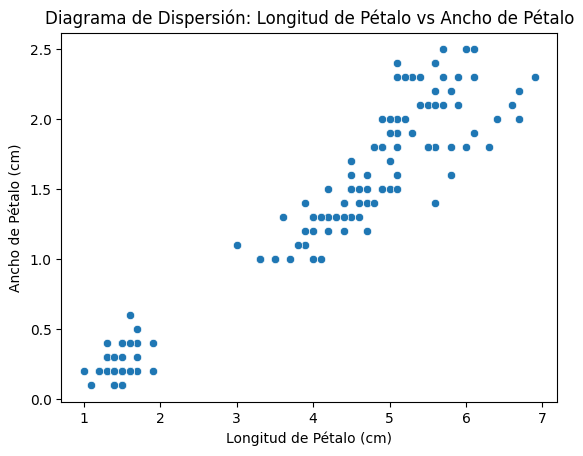

In [5]:
# Crea el diagrama de dispersión
sns.scatterplot(x="Longitud_Petalo", y="Ancho_Petalo", data=df_limpio)
plt.title("Diagrama de Dispersión: Longitud de Pétalo vs Ancho de Pétalo")
plt.xlabel("Longitud de Pétalo (cm)")
plt.ylabel("Ancho de Pétalo (cm)")
plt.show()

Ahora que tenemos los datos con los que realizaremos el modelo de regresión lineal, vamos a dividir los datos en datos de entrenamiento y datos de test, con estos ultimos comprobaremos como de accertado esta nuestro modelo


Mean Squared Error (MSE): 0.05
Coefficient of Determination (R^2): 0.93
Coeficientes: [0.41323829]
Intercepto: -0.35666804105655303


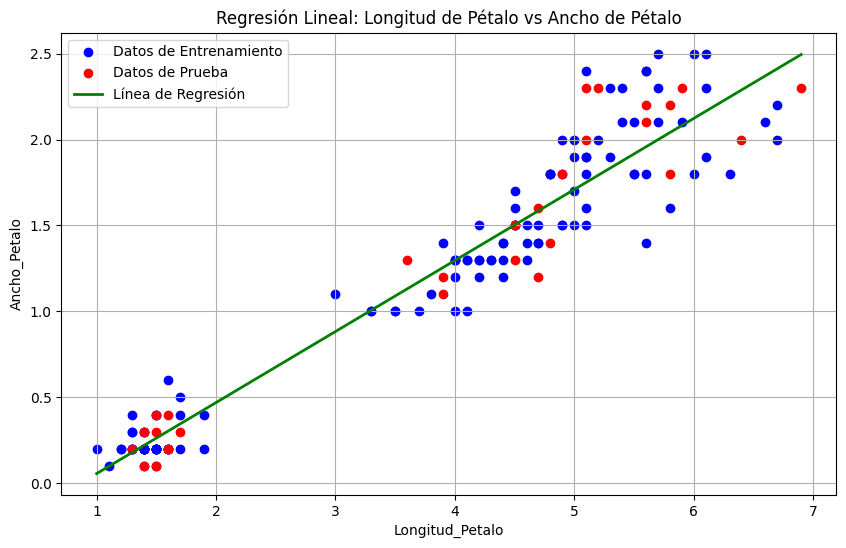

In [6]:
# Primero tenemos que separar los datos
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df_limpio[["Longitud_Petalo"]]
y = df_limpio["Ancho_Petalo"]

# Aquí estamos dividiendo los datos en 80% para entrenamiento y 20% para pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear una instancia del modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo usando el conjunto de entrenamiento
model.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Coefficient of Determination (R^2): {r2:.2f}')

# Coeficientes del modelo
coeficientes = model.coef_
intercepto = model.intercept_

print('Coeficientes:', coeficientes)
print('Intercepto:', intercepto)

# Mostrar la línea de regresión junto con los datos de entrenamiento y prueba
plt.figure(figsize=(10, 6))

# Graficar los datos de entrenamiento
plt.scatter(X_train, y_train, color='blue', label='Datos de Entrenamiento')

# Graficar los datos de prueba
plt.scatter(X_test, y_test, color='red', label='Datos de Prueba')

# Crear la línea de regresión (recta de predicción)
x_values = np.linspace(np.min(X), np.max(X), 100).reshape(-1, 1)
x_values = pd.DataFrame(x_values, columns=['Longitud_Petalo'])
y_values = model.predict(x_values)
plt.plot(x_values, y_values, color='green', linewidth=2, label='Línea de Regresión')

plt.title('Regresión Lineal: Longitud de Pétalo vs Ancho de Pétalo')
plt.xlabel('Longitud_Petalo')
plt.ylabel('Ancho_Petalo')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# Supongamos que tienes nuevas alturas para predecir el peso
prediccion_length = pd.DataFrame([[6], [0.5]], columns=['Longitud_Petalo'])

# Hacer predicciones con el modelo entrenado
predicciones_width = model.predict(prediccion_length)

# Mostrar las predicciones
for i, length in enumerate(prediccion_length.iterrows()):
    print(f'Para una longitud de {prediccion_length.iloc[i, 0]} cm, el ancho predicho es {predicciones_width[i]:.2f} cm')

Para una longitud de 6.0 cm, el ancho predicho es 2.12 cm
Para una longitud de 0.5 cm, el ancho predicho es -0.15 cm


# Modelo de regresión lineal **simple** (Estimación de mínimos cuadrados)

Si el resultado o variable dependiente ($y_{i}$) de cada observación depende de una única característica o variable independiente ($x_{i}$), entonces hablamos de un **modelo de regresión simple**. Este modelo se puede resolver con fórmulas más sencillas que incluso se pueden hacer a mano. Los parametros se denotan como ($\beta_{0}, \beta_{1}$):

\begin{align}
y_{i} = \beta_{0} + \beta_{1}x_{i}
\end{align}

Las estimaciones de mínimos cuadrados en este caso vienen dadas por fórmulas simples:

\begin{align}
\beta_{1} = \frac{\sum_{i=1}^{n}(x_{i}-\overline{x})(y_{i}-\overline{y})}{\sum_{i=1}^{n}(x_{i}-\overline{x})^{2}}
\end{align}

---

\begin{align}
\beta_{0} = \overline{y} - \beta_{1}\overline{x}
\end{align}

In [8]:
def least_squares(X, y):
  '''Using the least-squares approach: a line that minimizes the sum of squared residuals.'''
  beta1 = sum((X - X.mean()) * (y - y.mean())) / sum((X - X.mean())**2)
  beta0 = y.mean() - beta1 * X.mean()
  return (beta0, beta1)

In [9]:
print(least_squares(X_train.iloc[:, 0], y_train))
print(model.intercept_, model.coef_)

(-0.3566680410565519, 0.41323829366454884)
-0.35666804105655303 [0.41323829]


# Descenso de gradiente

  <img src="https://static.platzi.com/media/user_upload/descenso%20gradiente-fe5d2765-9120-4615-8142-9db358d25c88.jpg"></img>
  

In [10]:
class Linear_Regression:
    def __init__(self, data, learning_rate=0.1, iterations=300):
        self.X = data.iloc[:, 0]
        self.Y = data.iloc[:, 1]

        self.learning_rate = learning_rate
        self.iterations = iterations
        self.beta = [0, 0]

        self.costs = []
        self.history = [self.beta.copy()]

    def predict(self, X):
        return self.beta[0] + (self.beta[1] * X)

    def compute_cost(self, Y_pred):
        m = len(self.Y)
        J = (1 / (2*m)) * (np.sum(Y_pred - self.Y)**2)
        return J

    def train_model(self, logs=True, save_history=True):
        '''Performing Gradient Descent'''
        for _ in range(self.iterations):
            Y_pred = self.predict(self.X)
            m = len(self.Y)
            self.beta[0] = self.beta[0] - (self.learning_rate * ((1/m) * np.sum(Y_pred - self.Y)))
            self.beta[1] = self.beta[1] - (self.learning_rate * ((1/m) * np.sum((Y_pred - self.Y) * self.X)))

            if logs:
                cost = self.compute_cost(Y_pred)
                self.costs.append(cost)
                print(f'beta0: {self.beta[0]}, beta1: {self.beta[1]}, cost: {cost}')

            if save_history:
                self.history.append(self.beta.copy())

        print('  Results:')
        print(f'beta0: {self.beta[0]}, beta1: {self.beta[1]}')

    def get_current_accuracy(self, Y_pred):
        return 1 - sum(abs(Y_pred - self.Y) / self.Y) / len(Y_pred)

    def plot_data(self, X, Y, fig, line=None):
        plt.figure(fig)
        plt.scatter(X, Y, color='blue')
        if line is not None:
            plt.plot(X, line, color='red')
        plt.show()

    def plot_cost_evolution(self, start=0):
        plt.figure('Cost evolution')
        plt.plot(range(start, self.iterations), self.costs[start:], color='green')
        plt.show()

    def plot_loss_function(self):
        m = len(self.Y)

        def error(t0, t1):
            return np.sum((self.Y - (t1 * self.X + t0)) ** 2) / (2*m)

        def calculate_borders(t0_data, t1_data):
            t0min = min(t0_data)
            t0max = max(t0_data)
            t1min = min(t1_data)
            t1max = max(t1_data)
            xmin = int(t0min - (0.1 * t0max - t0min))
            xmax = int(t0max + (0.1 * t0max - t0min))
            ymin = int(t1min - (0.1 * t1max - t1min))
            ymax = int(t1max + (0.1 * t1max - t1min))
            return xmin, xmax, ymin, ymax

        t0_data, t1_data = list(zip(*self.history))
        xmin, xmax, ymin, ymax = calculate_borders(t0_data, t1_data)
        xp, yp = np.meshgrid(np.linspace(xmin, xmax, m), np.linspace(ymin, ymax, m))
        zp = np.array([error(t0, t1) for t0, t1 in zip(np.ravel(xp), np.ravel(yp))])
        zp = zp.reshape(xp.shape)

        errors = [error(t0, t1) for t0, t1 in self.history]

        ax = plt.axes(projection='3d')
        ax.set_xlabel('beta0')
        ax.set_ylabel('beta1')
        ax.set_zlabel('error')
        # Plot loss function
        ax.plot_surface(xp, yp, zp, cmap='viridis', edgecolor='green', alpha=0.5)
        # Plot evolution of error
        ax.plot(t0_data, t1_data, errors, color='red', linewidth=2)
        plt.show()

In [11]:
model2 = Linear_Regression(df_limpio)
model2.train_model(logs=True)

beta0: 0.11993333333333336, beta1: 0.5794066666666667, cost: 107.88003333333339
beta0: 0.010132308000000007, beta1: 0.11611612528888882, cost: 90.42198873188485
beta0: 0.08541597064976893, beta1: 0.4917855519792448, cost: 42.50722396473158
beta0: 0.01199469648432519, beta1: 0.19233325490751801, cost: 40.43012625057942
beta0: 0.05844972297498074, beta1: 0.4360716341139115, cost: 16.185521146856313
beta0: 0.008662363910808053, beta1: 0.24268184812502014, cost: 18.59085841938643
beta0: 0.036529622327678014, beta1: 0.40098197445335804, cost: 5.824380687544572
beta0: 0.0021209674286715857, beta1: 0.27624737222232837, cost: 8.879666489691893
beta0: 0.01802844153798677, beta1: 0.3792124121877472, cost: 1.8978579940389964
beta0: -0.006349093782633975, beta1: 0.2989135311368274, cost: 4.4569817123108395
beta0: 0.0018874439277430273, beta1: 0.3660348765787443, cost: 0.5088041509084683
beta0: -0.015923873749990037, beta1: 0.3144909510915727, cost: 2.3793227806284474
beta0: -0.012583852461870722, 

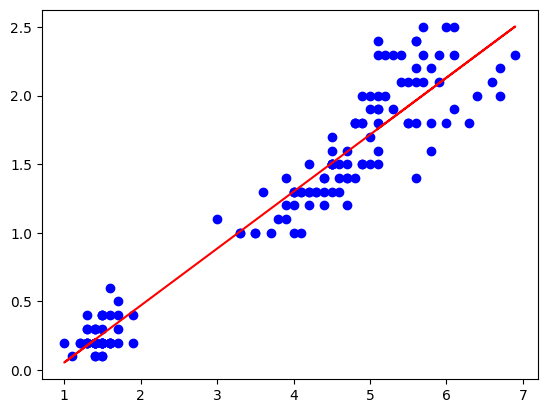

In [12]:
pred = model2.predict(model2.X)
model2.plot_data(model2.X, model2.Y, 'Data', pred)

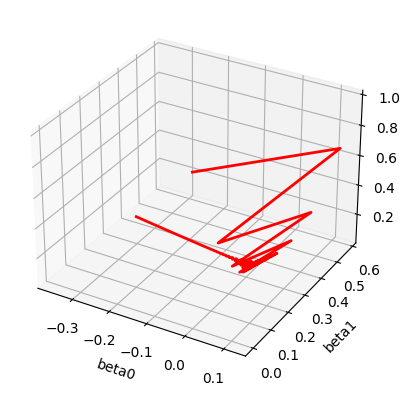

In [13]:
model2.plot_loss_function()

<img src="https://media.giphy.com/media/ZF5Td7AzQNZtycD1VU/giphy.gif"></img>




In [14]:
# Supongamos que tienes nuevas alturas para predecir el peso
prediccion_length2 = np.array([6, 0.5])

# Hacer predicciones con el modelo entrenado
predicciones_width2 = model2.predict(prediccion_length2)

# Mostrar las predicciones
for i, length in enumerate(prediccion_length2):
    print("Regresion Lineal por Descenso de gradiente")
    print(f'Para una longitud de {length} cm, el ancho predicho es {predicciones_width2[i]:.2f} cm')
    print("Regresion Lineal por Minimos Cuadrados")
    print(f'Para una longitud de {length} cm, el ancho predicho es {predicciones_width[i]:.2f} cm')


Regresion Lineal por Descenso de gradiente
Para una longitud de 6.0 cm, el ancho predicho es 2.13 cm
Regresion Lineal por Minimos Cuadrados
Para una longitud de 6.0 cm, el ancho predicho es 2.12 cm
Regresion Lineal por Descenso de gradiente
Para una longitud de 0.5 cm, el ancho predicho es -0.15 cm
Regresion Lineal por Minimos Cuadrados
Para una longitud de 0.5 cm, el ancho predicho es -0.15 cm
